# 📌 Extracción

In [71]:
# 1. Importar librerías necesarias
import requests
import pandas as pd
import json

# 2. Simulación de carga de datos desde la API
# (en un escenario real usarías: response = requests.get('URL_API'); data = response.json())
with open('TelecomX_Data.json') as file:
    data = json.load(file)

# 3. Convertir datos a DataFrame
df = pd.json_normalize(data)
print(df.shape)
df.head()


(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformación

In [72]:
# 4. Explorar columnas y tipos de datos
print(df.dtypes)
print(df.columns)

# 5. Supongamos que tenemos un diccionario de datos adicional que describe cada campo
# Ejemplo de revisión manual: "gender": género del cliente, "SeniorCitizen": si es ciudadano senior, etc.

# 6. Identificar las columnas más relevantes para análisis de evasión
# Ejemplo:
columns_relevantes = [
    'customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
    'customer.tenure', 'account.Contract', 'account.PaymentMethod',
    'account.Charges.Monthly', 'account.Charges.Total',
    'internet.InternetService', 'phone.PhoneService'
]
df_relevantes = df[columns_relevantes]
df_relevantes.head()


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.Int

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.tenure,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,internet.InternetService,phone.PhoneService
0,0002-ORFBO,No,Female,0,9,One year,Mailed check,65.6,593.3,DSL,Yes
1,0003-MKNFE,No,Male,0,9,Month-to-month,Mailed check,59.9,542.4,DSL,Yes
2,0004-TLHLJ,Yes,Male,0,4,Month-to-month,Electronic check,73.9,280.85,Fiber optic,Yes
3,0011-IGKFF,Yes,Male,1,13,Month-to-month,Electronic check,98.0,1237.85,Fiber optic,Yes
4,0013-EXCHZ,Yes,Female,1,3,Month-to-month,Mailed check,83.9,267.4,Fiber optic,Yes


In [73]:
# 7. Verificar valores nulos
print(df.isnull().sum())

# 8. Verificar duplicados
print(df.duplicated().sum())

# 9. Revisar valores extraños en columnas categóricas (por ejemplo, 'Churn')
print(df['Churn'].value_counts(dropna=False))

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64
0
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [74]:
# 10. Ejemplo: reemplazar valores vacíos en 'Churn' por 'Unknown'
df['Churn'] = df['Churn'].replace('', 'Unknown')

# 11. Asegurarse de que 'account.Charges.Total' sea numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# 12. Verificar de nuevo después de limpiar
print(df['Churn'].value_counts())
print(df['account.Charges.Total'].isnull().sum())

Churn
No         5174
Yes        1869
Unknown     224
Name: count, dtype: int64
11


In [75]:
# 13. Calcular "Cuentas_Diarias"
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()

,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [76]:
# 14. Convertir 'Churn' a valores binarios
df['Churn_Binario'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))

# 15. Renombrar columnas para mayor claridad
df.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Senior',
    'customer.tenure': 'MesesAntiguedad',
    'account.Contract': 'TipoContrato',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargoMensual',
    'account.Charges.Total': 'CargoTotal',
    'internet.InternetService': 'TipoInternet',
    'phone.PhoneService': 'TieneTelefono'
}, inplace=True)

df.head()

,customerID,Churn,Genero,Senior,customer.Partner,customer.Dependents,MesesAntiguedad,TieneTelefono,phone.MultipleLines,TipoInternet,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,TipoContrato,account.PaperlessBilling,MetodoPago,CargoMensual,CargoTotal,Cuentas_Diarias,Churn_Binario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0


# 📊 Carga y análisis

In [77]:
# Análisis descriptivo de variables numéricas
metricas = df.describe().T  # Transponer para mayor claridad
print(metricas)

# Calcular métricas adicionales si deseas: mediana, moda
mediana = df.median(numeric_only=True)
moda = df.mode().iloc[0]
desviacion = df.std(numeric_only=True)

print("\nMediana:\n", mediana)
print("\nModa:\n", moda)
print("\nDesviación estándar:\n", desviacion)


                  count         mean          std        min         25%  \
Senior           7267.0     0.162653     0.369074   0.000000    0.000000   
MesesAntiguedad  7267.0    32.346498    24.571773   0.000000    9.000000   
CargoMensual     7267.0    64.720098    30.129572  18.250000   35.425000   
CargoTotal       7256.0  2280.634213  2268.632997  18.800000  400.225000   
Cuentas_Diarias  7267.0     2.157337     1.004319   0.608333    1.180833   
Churn_Binario    7043.0     0.265370     0.441561   0.000000    0.000000   

                         50%          75%          max  
Senior              0.000000     0.000000     1.000000  
MesesAntiguedad    29.000000    55.000000    72.000000  
CargoMensual       70.300000    89.875000   118.750000  
CargoTotal       1391.000000  3785.300000  8684.800000  
Cuentas_Diarias     2.343333     2.995833     3.958333  
Churn_Binario       0.000000     1.000000     1.000000  

Mediana:
 Senior                0.000000
MesesAntiguedad      29.00

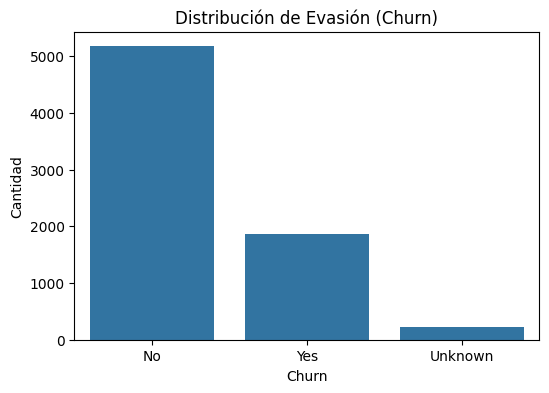

Churn
No         71.198569
Yes        25.719004
Unknown     3.082427
Name: proportion, dtype: float64


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la columna 'Churn'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
plt.show()

# Proporción
proporcion = df['Churn'].value_counts(normalize=True) * 100
print(proporcion)


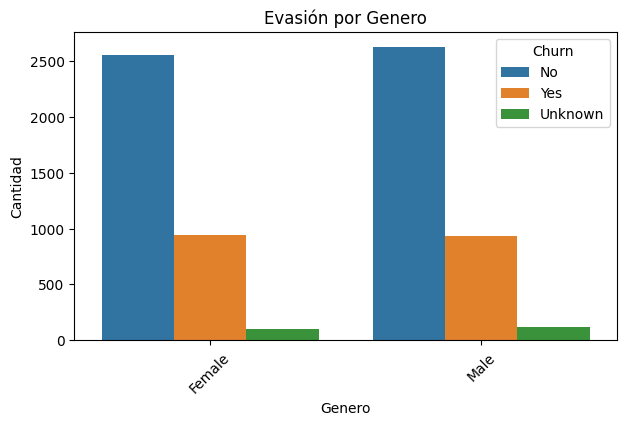

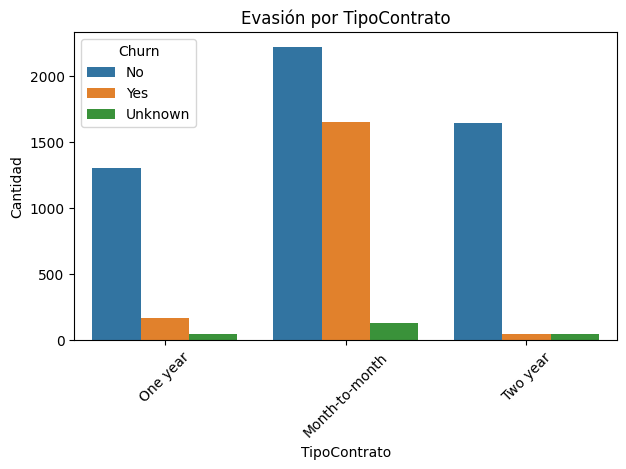

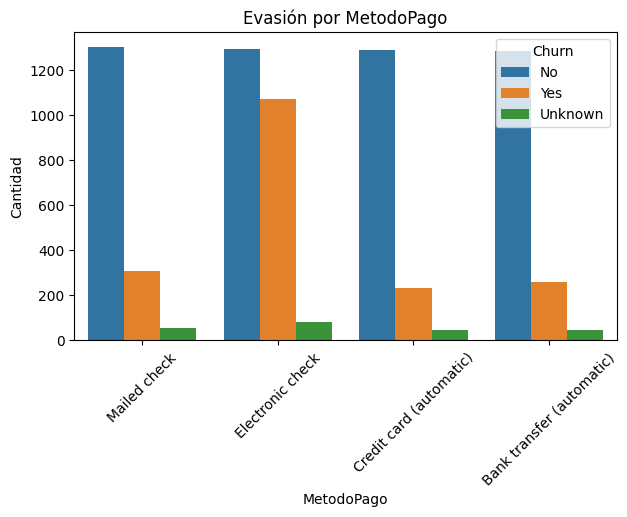

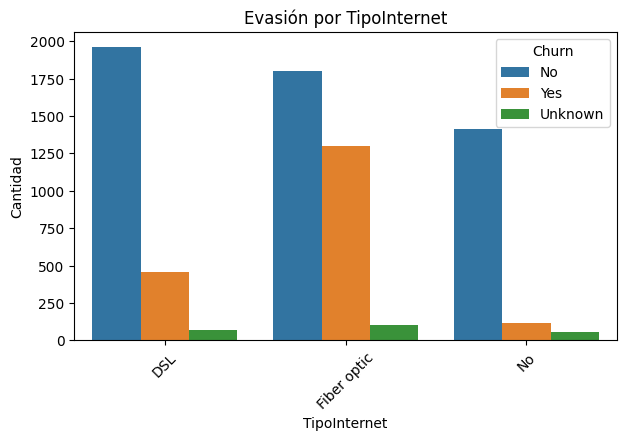

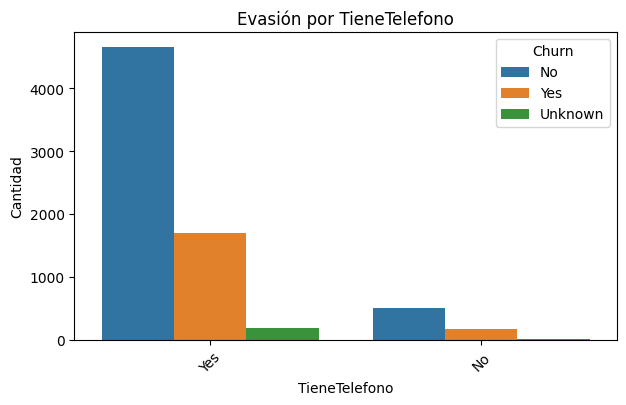

In [79]:
# Lista de variables categóricas relevantes
categoricas = ['Genero', 'TipoContrato', 'MetodoPago', 'TipoInternet', 'TieneTelefono']

# Graficar recuento de evasión por cada variable
for col in categoricas:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Evasión por {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    plt.show()


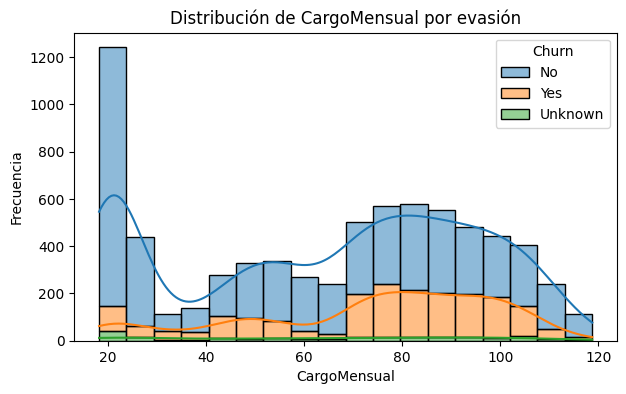

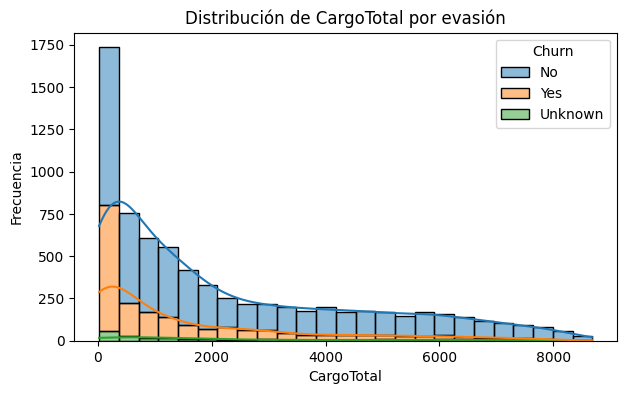

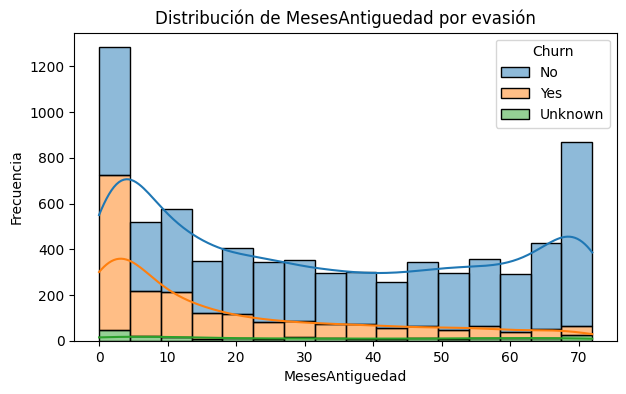

In [80]:
# Variables numéricas relevantes
numericas = ['CargoMensual', 'CargoTotal', 'MesesAntiguedad']

for col in numericas:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, multiple='stack')
    plt.title(f'Distribución de {col} por evasión')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


# 📄 **Informe Final - Análisis de Evasión de Clientes TelecomX LATAM**

## 🔹 **Introducción**
El objetivo del análisis es comprender el problema de evasión de clientes (churn) para Telecom X LATAM, identificar patrones y variables que influyen en que los clientes cancelen el servicio.

## 🔹 **Limpieza y Tratamiento de Datos**
- Importamos datos desde la API (JSON).
- Convertimos a DataFrame, estandarizamos tipos de datos y renombramos columnas para mayor claridad.
- Corregimos valores vacíos en `Churn` y transformamos a formato binario para análisis.

## 🔹 **Análisis Exploratorio de Datos**
- Calculamos métricas como media, mediana y desviación estándar para comprender la distribución.
- Visualizamos la proporción de clientes que permanecen vs. los que cancelaron.
- Exploramos la evasión según género, tipo de contrato, método de pago, servicio de internet y teléfono.
- Analizamos variables numéricas como el total gastado, cargos mensuales y antigüedad para ver diferencias entre clientes que evaden y los que permanecen.

## 🔹 **Conclusiones e Insights**
- La mayor parte de los clientes permanecen, pero existe una fracción significativa que cancela, especialmente en contratos mensuales.
- Los clientes con cargos mensuales más altos y menor antigüedad tienden a presentar mayor evasión.
- Métodos de pago electrónicos parecen asociarse a mayor evasión.

## 🔹 **Recomendaciones**
- Promover contratos a largo plazo con descuentos para reducir churn.
- Ofrecer incentivos a clientes con cargos altos o baja antigüedad.
- Revisar estrategias de retención para clientes que pagan por métodos electrónicos.

🚀 Este análisis puede servir de base para construir modelos predictivos y diseñar campañas de retención.
